In [113]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [114]:
SAMPLES_NUMBERS = 100

In [136]:
samples = np.array([
    *[[random.randint(171,200), random.randint(66,100),1] for _ in range(SAMPLES_NUMBERS) ],
    *[[random.randint(140,170), random.randint(40,65),2] for _ in range(SAMPLES_NUMBERS) ],
    *[[random.randint(170,200), random.randint(40,65),3] for _ in range(int(SAMPLES_NUMBERS/2))],
    *[[random.randint(140,170), random.randint(65,100),4] for _ in range(int(SAMPLES_NUMBERS/2)) ]
], dtype=float)

In [137]:
class Normalization:
    def __init__(self, ds):
        self.norm_params = [
            (np.min(ds[:,i]), np.max(ds[:,i]))
            for i in range(2)
        ]
    def normalize(self, ds):
        for i in range(2):
            min_value, max_value = self.norm_params[i]
            ds[:,i] = (ds[:,i] - min_value)/(max_value-min_value)
        return ds

In [138]:
normalization = Normalization(samples)
samples = normalization.normalize(samples)

In [139]:
df = pd.DataFrame(samples, columns=['height', 'weight', 'class'])

In [140]:
df.head()

,height,weight,class
0,0.933333,0.833333,1.0
1,0.816667,0.733333,1.0
2,0.966667,0.950000,1.0
3,0.850000,0.650000,1.0
4,0.750000,0.533333,1.0


In [141]:
df.describe()

,height,weight,class
count,300.000000,300.000000,300.000000
mean,0.516056,0.459333,2.166667
std,0.287761,0.290056,1.068970
min,0.000000,0.000000,1.000000
25%,0.300000,0.216667,1.000000
50%,0.500000,0.416667,2.000000
75%,0.750000,0.700000,3.000000
max,1.000000,1.000000,4.000000


<AxesSubplot:xlabel='height', ylabel='weight'>

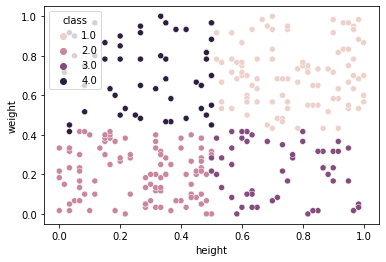

In [142]:
sns.scatterplot(x="height", y="weight", data=df, hue="class")

In [143]:
x = np.hstack((samples[:,:2], np.ones((samples.shape[0],1), dtype=float))).T
y = np.zeros((int(samples[:,2].max()), samples.shape[0]))
y[samples[:,2].astype(int)-1, np.arange(samples.shape[0])]=1

In [144]:
samples.shape[0]-1

299

In [145]:
x[:, :10]

array([[0.93333333, 0.81666667, 0.96666667, 0.85      , 0.75      ,
        0.85      , 1.        , 0.65      , 0.96666667, 0.95      ],
       [0.83333333, 0.73333333, 0.95      , 0.65      , 0.53333333,
        0.55      , 0.7       , 0.68333333, 0.7       , 0.53333333],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [146]:
y[:,:10]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [147]:
w = np.random.uniform(-0.3, 0.3, ( y.shape[0], x.shape[0]))

In [148]:
w

array([[ 0.13093851,  0.08782805,  0.00806214],
       [ 0.16465792,  0.17118763, -0.17929712],
       [-0.29620157,  0.27851209, -0.15595806],
       [-0.18583917,  0.12567262,  0.22091391]])

In [149]:
max_iterations = 1000
learning_rate = 0.5
errors = []
min_error = 0.01

for i in range(max_iterations):
    y_predict = w.dot(x)
    error = y - y_predict
    mean_error = np.abs(error).mean()
    errors.append(mean_error)
    w += error.dot(x.T)/x.shape[1] * learning_rate
    if(i%100==0):
        print(mean_error)
    if mean_error<min_error:
        break

0.3375275622287061
0.24261464522017617
0.2429195180343881
0.24294844778083677
0.2429500038299659
0.24295008376607152
0.24295008777986568
0.24295008797901924
0.24295008798883766
0.24295008798932002


<AxesSubplot:>

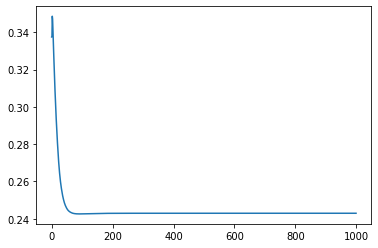

In [150]:
sns.lineplot(x=range(len(errors)), y=errors)

In [151]:
errors[-1]

0.24295008798934367

In [152]:
def predict(records):
    if len(records.shape)==1:
        records = np.array([records])
    records = normalization.normalize(records)
    records =  np.hstack((records, np.ones((records.shape[0],1), dtype=float))).T
    prediction = w.dot(records)
    print(prediction)
    return np.argmax(prediction)

In [153]:
predict(np.array([180.0, 70.0]))

[[0.48906354]
 [0.18411306]
 [0.23253234]
 [0.09429106]]


0

In [154]:

predict(np.array([160.0, 50.0]))

[[-0.03745479]
 [ 0.70792308]
 [ 0.24456088]
 [ 0.08497083]]


1

In [156]:
predict(np.array([200.0, 50.0]))

[[ 0.51734036]
 [ 0.19059848]
 [ 0.6528468 ]
 [-0.36078565]]


2

In [157]:
predict(np.array([150.0, 99.0]))

[[ 0.43419226]
 [ 0.18764231]
 [-0.38713078]
 [ 0.76529621]]


3